In [9]:
import pandas as pd

In [12]:
df = pd.read_csv('/home/manju/Downloads/Sample_Superstore.csv', encoding='ISO-8859-1')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [13]:

# Exploring the dataset
data_overview = {
    "Data Shape": df.shape,
    "Data Types": df.dtypes,
    "Missing Values": df.isnull().sum(),
    "Sample Data": df.head()
}

data_overview["Sample Data"]


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:

# Data Cleaning: Checking for missing values and data inconsistencies

# Summary of missing values in each column
missing_values = df.isnull().sum()

# Checking for any duplicate rows
duplicate_rows = df.duplicated().sum()

# Data types of each column for consistency
column_data_types = df.dtypes

# Summary of missing values, duplicate rows, and data types
data_cleaning_summary = {
    "Missing Values": missing_values,
    "Duplicate Rows": duplicate_rows,
    "Column Data Types": column_data_types
}

data_cleaning_summary


{'Missing Values': Row ID           0
 Order ID         0
 Order Date       0
 Ship Date        0
 Ship Mode        0
 Customer ID      0
 Customer Name    0
 Segment          0
 Country          0
 City             0
 State            0
 Postal Code      0
 Region           0
 Product ID       0
 Category         0
 Sub-Category     0
 Product Name     0
 Sales            0
 Quantity         0
 Discount         0
 Profit           0
 dtype: int64,
 'Duplicate Rows': 0,
 'Column Data Types': Row ID             int64
 Order ID          object
 Order Date        object
 Ship Date         object
 Ship Mode         object
 Customer ID       object
 Customer Name     object
 Segment           object
 Country           object
 City              object
 State             object
 Postal Code        int64
 Region            object
 Product ID        object
 Category          object
 Sub-Category      object
 Product Name      object
 Sales            float64
 Quantity           int64
 Discount 

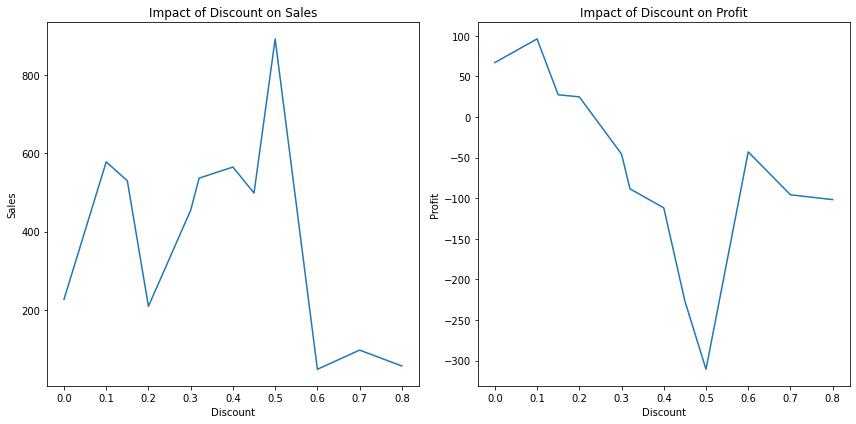

,Discount,Sales,Profit
count,12.000000,12.000000,12.000000
mean,0.376667,391.172772,-67.443289
std,0.245850,260.973663,117.646088
min,0.000000,48.150000,-310.703456
25%,0.187500,181.102132,-104.329455
50%,0.360000,476.688487,-67.120146
75%,0.525000,543.879796,25.349004
max,0.800000,892.705152,96.055074


In [15]:

import matplotlib.pyplot as plt
import seaborn as sns

# Converting 'Order Date' and 'Ship Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Analyzing the impact of Discounts on Sales and Profit
discount_impact = df.groupby('Discount').agg({'Sales': 'mean', 'Profit': 'mean'}).reset_index()

# Visualizing the impact of Discounts on Sales and Profit
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(data=discount_impact, x='Discount', y='Sales')
plt.title('Impact of Discount on Sales')

plt.subplot(1, 2, 2)
sns.lineplot(data=discount_impact, x='Discount', y='Profit')
plt.title('Impact of Discount on Profit')

plt.tight_layout()
plt.show()

# Summary of the analysis
discount_impact_summary = discount_impact.describe()
discount_impact_summary


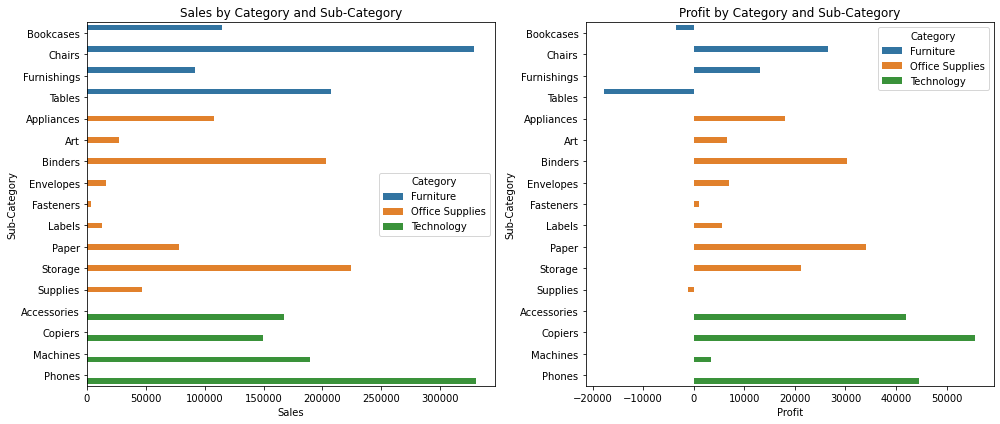

,Sales,Profit
count,17.000000,17.000000
mean,135129.462371,16846.883629
std,102940.280693,19689.825106
min,3024.280000,-17725.481100
25%,46673.538000,3384.756900
50%,114879.996300,13059.143600
75%,203412.733000,30221.763300
max,330007.054000,55617.824900


In [16]:

# Analyzing Sales and Profit by Category and Sub-Category
category_analysis = df.groupby(['Category', 'Sub-Category']).agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Visualizing Sales and Profit by Category and Sub-Category
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=category_analysis, x='Sales', y='Sub-Category', hue='Category')
plt.title('Sales by Category and Sub-Category')

plt.subplot(1, 2, 2)
sns.barplot(data=category_analysis, x='Profit', y='Sub-Category', hue='Category')
plt.title('Profit by Category and Sub-Category')

plt.tight_layout()
plt.show()

# Summary of Category and Sub-Category Analysis
category_analysis_summary = category_analysis.describe()
category_analysis_summary


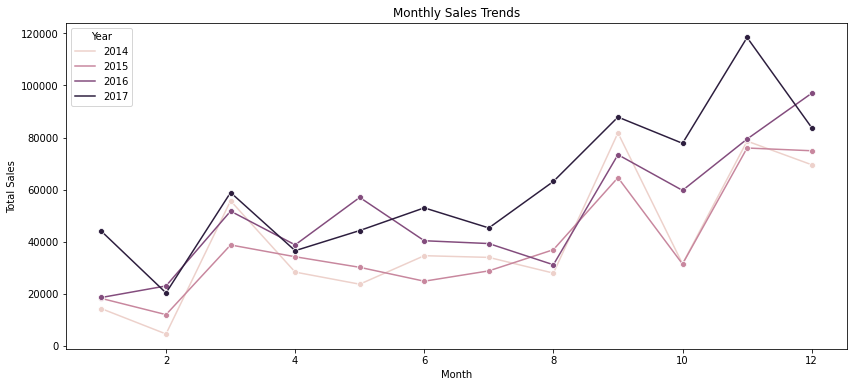

,Sales
Year,
2014,484247.4981
2015,470532.5090
2016,609205.5980
2017,733215.2552


In [17]:

# Creating a year and month column for temporal analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Temporal Analysis: Monthly and Yearly Trends in Sales
monthly_sales = df.groupby(['Year', 'Month']).agg({'Sales': 'sum'}).reset_index()

# Visualizing Monthly Sales Trends
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Month', y='Sales', hue='Year', marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend(title='Year')
plt.show()

# Yearly Sales Summary
yearly_sales_summary = monthly_sales.groupby('Year').agg({'Sales': 'sum'})
yearly_sales_summary
